<a href="https://colab.research.google.com/github/amalvarezme/SenalesSistemas/blob/master/EjerciciosParciales2022_2/P22022_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parcial 2 - Señales y Sistemas 2022 - 2


## Pregunta 1 (1.5 puntos):

Encuentre la expresión del espectro de Fourier (forma exponencial y trigonométrica) para la señal $x(t)=|4\sin(3t)|^2$, con $t\in [-\pi, \pi]$.


## Solución:

Se tiene que:

$$x(t)=|4\sin(3t)|^2 = 4^2\sin^2(3t) = 16\left(\frac{1}{2}-\frac{\cos(6t)}{2}\right) = \frac{16}{2}-\frac{16\cos(6t)}{2} = 8 - 8\cos(6t)$$

Ahora, por serie trigonométrica:

$$x(t) = a_0 + \sum_{n=-N}^N{a_n\cos(n\omega_0 t) + a_n\sin(n\omega_0 t)},$$

donde:

$$a_0 = c_0 = \frac{1}{tf-ti}\int_{t_i}^{t_f}x(t)dt$$

y

$$a_n = \frac{2}{tf-ti}\int_{t_i}^{t_f}x(t)\cos(n\omega_0 t)dt$$

$$b_n = \frac{2}{tf-ti}\int_{t_i}^{t_f}x(t)\sin(n\omega_0 t)dt$$

wo= 1.0
Fo= 1.5707963267948966


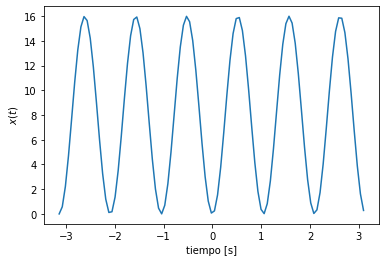

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

ti = -np.pi #tiempo inicial
tf = np.pi #tiempo final
wo = 2*np.pi/(tf-ti) #frecuencia angular
Fo = wo/2*np.pi #frecuencia fundamental
print('wo=',wo)
print('Fo=',Fo)
Fs = 10*Fo #frecuencia muestreo -> debe respetar Nyquist Fs >= 2 Fo
tv = np.arange(ti,tf,1/Fs) #vector de tiempo

x = abs(4*np.sin(3*tv))**2 #señal de entrada
plt.plot(tv,x) #gráfica de la señal
plt.xlabel('tiempo [s]')
plt.ylabel('$x(t)$')
plt.show()

Dado que $x(t)$ presenta simetría par, $x(t)=x(-t)$:


 $$\boxed{b_n = 0 \quad \forall n \in \{0,1,\dots,N\}}$$

Así:

$$x(t)=|4\sin(3t)|^2 = 8-8\cos(6t) = a_0 + \sum_{n=-N}^N{a_n\cos(n\omega_0 t)}$$

$a_0$ codifica el nivel DC de la señal, entonces:

$$a_0 = \frac{1}{\pi-(-\pi)}\int_{-\pi}^{\pi}\left(8-8\cos(6t)\right)dt = \frac{8}{2\pi}\int_{-\pi}^{\pi}dt-\frac{8}{2\pi}\int_{-\pi}^{\pi}\cos(6t)dt$$

$$a_0 = \frac{8}{2\pi} t \Big|_{-\pi}^{\pi} - \frac{8}{12\pi}\sin(6t)\Big|_{-\pi}^\pi = \frac{8(\pi-(-\pi))}{2\pi}-\frac{8}{12\pi}\left(\sin(6\pi)-\sin(-6\pi)\right) = \frac{16\pi}{2\pi}$$

$$\boxed{a_0 = 8}$$

Por otra parte, 

$$a_n = \frac{2}{\pi-(-\pi)}\int_{-\pi}^{\pi}x(t)\cos(n\omega_0 t)dt = \frac{2}{2\pi}\int_{-\pi}^{\pi}\left( 8-8\cos(6t)\right)\cos(n\omega_0 t)dt$$

$$a_n = \frac{8}{\pi}\int_{-\pi}^{\pi}{\cos(n\omega_0 t)dt} - \frac{8}{\pi}\int_{-\pi}^{\pi}{\cos(6t)\cos(n\omega_0 t)dt}$$

Teniendo en cuenta que:

$$\cos(\theta)\cos(\alpha)=\frac{\cos(\theta+\alpha)+\cos(\theta-\alpha)}{2}$$

Entonces:

$$a_n = \frac{8}{\pi}\int_{-\pi}^{\pi}{\cos(n\omega_0 t)dt} - \frac{8}{2\pi}\int_{-\pi}^{\pi}{\cos([6+n\omega_0] t)dt} - \frac{8}{2\pi}\int_{-\pi}^{\pi}{\cos([6-n\omega_0] t)dt}$$

En este caso: $\boxed{\omega_0 = 2\pi/2\pi = 1 [rad/s]}$

$$a_n = \frac{8}{\pi n }\sin(nt)\Big|_{-\pi}^{\pi} - \frac{8}{2\pi(6+n)}\sin([6+n]t)\Big|_{-\pi}^{\pi} - \frac{8}{2\pi(6-n)}\sin([6-n]t)\Big|_{-\pi}^{\pi}$$

$$a_n = \frac{8}{\pi n }\left(\sin(n\pi)-\sin(-n\pi)\right) - 8\frac{\sin([6+n]\pi)-\sin(-[6+n]\pi)}{2\pi(6+n)}-8\frac{\sin([6-n]\pi)-\sin(-[6-n]\pi)}{2\pi(6-n)}$$


$$a_n = -8\frac{\sin([6+n]\pi)-\sin(-[6+n]\pi)}{2\pi(6+n)}-8\frac{\sin([6-n]\pi)-\sin(-[6-n]\pi)}{2\pi(6-n)}$$ 

Para $n\neq 6,$ $a_n = 0.$ No obstante, para $n = 6$ debemos calcular el límite y aproximar la indeterminación $\frac{0}{0}$:


$$a_6 = -8\lim_{n\to 6}\frac{\tfrac{d}{dn}\left[\sin([6-n]\pi)-\sin(-[6-n]\pi)\right]}{\tfrac{d}{dn}\left[2\pi(6-n)\right]} = -8\lim_{n\to 6}\frac{\cos([6-n]\pi)(-\pi)-\cos(-[6-n]\pi)\pi}{-2\pi}$$

$$a_6 = -8\frac{\cos(0)(-\pi)-\cos(0)\pi}{-2\pi}=\frac{16\pi}{-2\pi} = -8$$

$$\boxed{a_6 = -8}$$

Por consiguiente:

$$\boxed{a_n = \left\{\begin{align} 8 & \quad n = 0\\ 
-8 & \quad n = 6\\
0 & \quad \forall n \setminus \{0,6\}
\end{align}\right.}$$


$$\boxed{b_n = 0 \quad \forall n\in \{0,1,2,\dots,N\}}$$

Para el caso de la serie exponencial compleja:

$$c_0 = a_0 = 8$$

y

$$c_n = \frac{a_n - j b_n}{2}$$

Entonces:

$$\boxed{c_n = \left\{\begin{align} 8 & \quad n = 0\\ 
-4 & \quad n = \{6,-6\}\\
0 & \quad \forall n \setminus \{0,6,-6\}
\end{align}\right.}$$

y

$$\boxed{x(t) = \sum_{n=-N}^{N}{c_n e^{j n t}}}$$


$$\boxed{x(t) = c_{-6}e^{-j6t} + c_{0}e^{0} + c_{6}e^{j6t} = -4(\cos(6t)-j\sin(6t))+8-4(\cos(6t)+j\sin(6t)) = 8 -8\cos(6t)}$$




## Pregunta 2 (1.5 puntos):


Realice las simulaciones respectivas para graficar el espectro de Fourier del ejercicio 1 (magnitud y fase), y presente el error relativo y la señal reconstruida para $N = \{1,2,\dots,20\}$


## Solución:

El espectro se puede graficar en términos de magnitud y fase, según:


$$|c_n| = \sqrt{c_n c_n^*}$$

$$\phi_n = \tan^{-1}\left(\frac{Im\{c_n\}}{Re\{c_n\}}\right)$$

In [ ]:
#se crean las bases de la serie exponencial compleja de Fourier
T = tf - ti #intervalo de interés
N = 20 #número armonicos a simular
wo = 2*np.pi/T # frecuencia fundamental
# definir bases
phin = np.zeros((len(tv),2*N+1),dtype=np.complex_)#crear matriz para guardar bases
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)#base de fourier en el intervalo de interés

In [ ]:
# graficar bases
from ipywidgets import interact,IntSlider

def pltbase(n=1):
    plt.plot(tv,np.real(phin[:,int(n+N)]),label="Re{$\phi_n$(t)}")
    plt.xlabel("t[s]",fontsize = 14)
    plt.ylabel("$\phi_n$(t)",fontsize = 14)
    plt.plot(tv,np.imag(phin[:,int(n+N)]),label="Im{$\phi_n$(t)}")
    plt.grid()    
    plt.legend()
    plt.show()
    return
interact(pltbase,n=(-N,N,1))

interactive(children=(IntSlider(value=1, description='n', max=20, min=-20), Output()), _dom_classes=('widget-i…

<function __main__.pltbase(n=1)>

In [ ]:
#calcular espectro -> cambiar según la señal estudiada
cn = np.zeros(2*N+1,dtype=np.complex_)
nv = np.linspace(-N, N, 2*N+1) #vector armónicos
cn[N] = 8 # nivel dc C_0 
cn[N-6] = -4 #armónico -6
cn[N+6] = -4 #armónico +6

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of indi

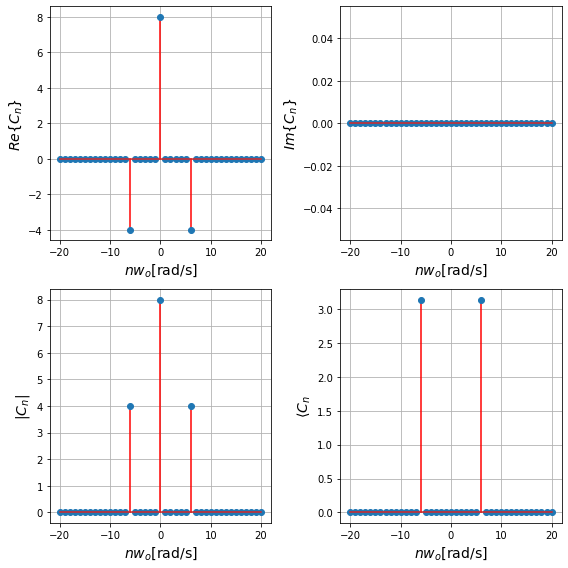

In [ ]:
#graficar espectro
fig = plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.stem(nv, np.real(cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Re\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,2)
plt.stem(nv, np.imag(cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Im\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,3)
plt.stem(nv, abs(cn), 'r')#magnitud del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$|C_n|$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,4)
plt.stem(nv, np.angle(cn), 'r')#fase del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$\langle C_n$',fontsize = 14)
plt.axis('tight')
plt.grid()

fig.tight_layout()

El error relativo se calcula según:

$$Er[\%] = \left[1 - \frac{1}{P_x}\sum_{n=-N}^N{|c_n|^2}\right]100 [\%]$$

En este caso:


$$P_x = \frac{1}{T}\int_{t_i}^{t_f}|x(t)|^2dt = \frac{1}{2\pi}\int_{-\pi}^{\pi}\left|8-8\cos(6t)\right|^2dt$$

$$P_x = \frac{1}{2\pi}\int_{-\pi}^{\pi}8^2dt - \frac{2}{2\pi}\int_{-\pi}^{\pi}8(8)\cos(6t) dt + \frac{1}{2\pi}\int_{-\pi}^{\pi}8^2\cos^2(6t)dt$$

$$P_x = \frac{64}{2\pi}t\Big|_{-\pi}^{\pi} - \frac{64}{6\pi}\sin(6t)\Big|_{-\pi}^{\pi} + \frac{64}{2\pi}\int_{-\pi}^{\pi}\frac{1}{2}dt + \frac{64}{2\pi}\int_{-\pi}^{\pi}\frac{\cos(12t)}{2}dt$$

$$P_x = \frac{64}{2\pi}(\pi-(-\pi)) - \frac{64}{6\pi}(\sin(6\pi)-\sin(-6\pi)) + \frac{64}{4\pi}(\pi-(-\pi)) + \frac{64}{4(12)\pi}\sin(12t)\Big|_{-\pi}^\pi$$

$$P_x = \frac{64}{2\pi}2\pi +\frac{64}{4\pi}2\pi +64\frac{(\sin(12\pi)-\sin(-12\pi))}{4(12)\pi}$$

$$P_x = 64 + \frac{64}{2} = 64+32 $$

$$\boxed{P_x = 96}$$

Así:

$$E_r[\%] = \left[1 - \frac{|c_{-6}|^2 + |c_0|^2 + |c_6|^2}{P_x}\right]100 [\%]$$


$$|c_{-6}|^2 = |c_6|^2 = -4(-4) = 16$$

$$|c_0|^2 = 8(8) = 64$$

$$E_r[\%] = \left[1 - \frac{|c_{-6}|^2 + |c_0|^2 + |c_6|^2}{P_x}\right]100 [\%]$$


$$E_r[\%] = \left[1 - \frac{16+64+16}{96}\right]100 [\%] = \left[1 - \frac{96}{96}\right]100 [\%] = \left[1 - 1\right]100 [\%]$$

$$\boxed{E_r= 0 [\%]}$$





In [ ]:
#graficar reconstrucción

Px = 96 # potencia señal x(t)
def pltest(Na=1):
    ind = range(N-Na,N+Na+1)
    er = 1- np.sum(abs(cn[ind])**2)/Px
    #señal reconstruida
    xe = phin[:,ind].dot(cn[ind] ) # dot calcula el producto entre vectores
    plt.plot(tv,xe,color='b',label='$x_e(t)$') # señal estimada o filtrada
    plt.plot(tv,x,color='r',label='$x(t)$') #señal original
    plt.title('E_r=%.2f[%%]' % (100*er),fontsize=16)
    plt.xlabel('t[s]')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend()
    plt.show()
    return
interact(pltest,Na=(1,N,1))

interactive(children=(IntSlider(value=1, description='Na', max=20, min=1), Output()), _dom_classes=('widget-in…

<function __main__.pltest(Na=1)>

## Pregunta 3 (2 puntos):

Sea la señal portadora $c(t) = A_c\sin(2\pi F_c t),$ con $A_c,F_c\in\mathbb{R},$ y la señal mensaje $m(t)\in\mathbb{R}$. Encuentre el espectro en frecuencia de la señal modulada en amplitud (AM), $y(t) = \left(1+\frac{m(t)}{A_c}\right)c(t)$. Luego, descargue desde youtube $5$ segundos de su canción favorita (capturando del segundo 20 al 25). Presente una simulación de modulación por amplitud AM (tomando como mensaje el fragmento de la canción escogida y con un índice de modulación de 0.5). Grafique las señales en tiempo y frecuencia (magnitud y fase) de la señal mensaje, portadora y modulada. Reproduzca los fragmentos de audio del mensaje, portadora y señal modulada. Nota: se sugiere utilizar un canal de señal de audio para el desarrollo del ejercicio.

## Solución:

La transformada de Fourier de la señal modulada se puede encontrar como:

$$Y(\omega) = \mathcal{F}\{y(t)\} = \mathcal{F}\left\{\left(1+\frac{m(t)}{A_c}\right)c(t)\right\}=\mathcal{F}\{c(t)\}+\frac{1}{A_c}\mathcal{F}\{m(t)c(t)\}$$

En este caso (utilizando tablas de Fourier):

$$C(\omega) = \mathcal{F}\{c(t)\} = \mathcal{F}\{A_c\sin(2\pi F_c t)\} = A_c\mathcal{F}\left\{\frac{e^{2\pi F_ct}-e^{-2\pi F_ct}}{2j}\right\}$$

y

$$\mathcal{F\{e^{\pm j\omega_0 t}\}} = 2\pi\delta(\omega \mp \omega_0)$$

Por consiguiente:

$$\boxed{C(\omega) = \frac{A_c\pi}{j}(\delta(\omega - 2\pi F_c)-\delta(\omega + 2\pi F_c))}$$

De forma similar:

$$\frac{1}{A_c}\mathcal{F}\{m(t)c(t)\} = \frac{1}{A_c}\mathcal{F}\{m(t)A_c\sin(2\pi F_c t)\} = \mathcal{F}\{m(t)\sin(2\pi F_c t)\} = \mathcal{F}\left\{\frac{m(t)e^{2\pi F_ct}-m(t)e^{-2\pi F_ct}}{2j}\right\}$$

teniendo en cuenta que:

$$\mathcal{F}\{x(t)e^{\pm j\omega_0t}\} = X(\omega \mp \omega_0)$$


Entonces:

$$\boxed{\frac{1}{A_c}\mathcal{F}\{m(t)c(t)\} = \frac{1}{2j}\left(M(\omega - 2\pi F_c)-M(\omega + 2\pi F_c)\right)}$$


Finalmente, el espectro de la señal modulada se puede escribir como:

$$\boxed{Y(\omega) = \frac{A_c\pi}{j}(\delta(\omega - 2\pi F_c)-\delta(\omega + 2\pi F_c)) + \frac{1}{2j}\left(M(\omega - 2\pi F_c)-M(\omega + 2\pi F_c)\right)}$$


In [ ]:
#simulación con canción de youtube
#instalar api youtube-dl
! pip install youtube-dl
#descargar canción de interés
link="https://www.youtube.com/watch?v=tAGnKpE4NCI&ab_channel=Metallica"
! youtube-dl --extract-audio -o "audio.%(mp3)s" --audio-format mp3  {link}

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[youtube] tAGnKpE4NCI: Downloading webpage
[download] Resuming download at byte 5611130
[download] Destination: audio.NA
[download] 100% of 6.33MiB in 00:13
[ffmpeg] Destination: audio.mp3
Deleting original file audio.NA (pass -k to keep)


In [ ]:
#convertir a .wav con ffmpeg para extraer audio en python
!ffmpeg -i audio.mp3 output.wav

ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-li

In [ ]:
#instalar soundfile para cargar .wav
!pip install soundfile

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import soundfile as sf # para instalar pip install soundfile
from IPython.display import Audio #librería para reproducir audio
#leer archivo wav
nombre_out = "output.wav"
xa, fs = sf.read(nombre_out)
# read speech signal from file
print('Frecuencia de muestreo %.2f[Hz]\naudio %s' % (fs,nombre_out))

Frecuencia de muestreo 48000.00[Hz]
audio output.wav


In [ ]:
xpro = xa.copy() #copiar archivos para procesar
#leer 5 segundos de la canción
ti = 20 #tiempo incio a procesar seg
tf = 25 #tiempo final a procesar seg
m = xpro[int(ti*fs):int((tf*fs)),0] #señal mensaje en primer canal

In [ ]:
#repoducir fragmento original #señal mensaje
Audio(m,rate=fs)

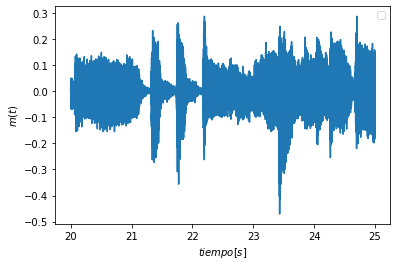

In [ ]:
#Señal mensaje en tiempo y frecuencia
tt = np.arange(ti,tf,1/fs) # vector de tiempo
plt.plot(tt,m) #graficar señal mensaje en el tiempo
plt.xlabel('$tiempo [s]$')
plt.ylabel('$m(t)$')
plt.legend()
plt.show()

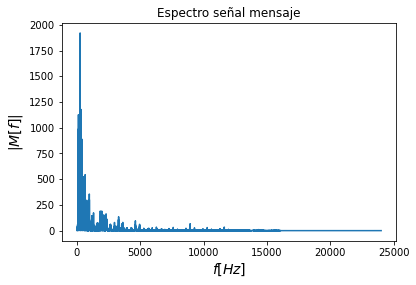

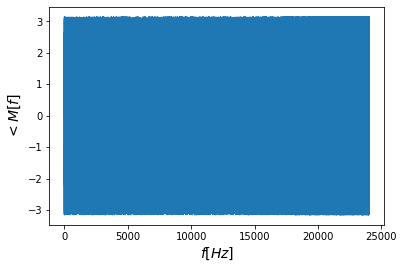

In [ ]:
#Fourier señal mensaje
Mw = np.fft.rfft(m) # axis=0 permite aplicar fft por cada columna de xpro
vf = np.fft.rfftfreq(m.shape[0],1/fs) #se crea el vector de frecuencias
plt.plot(vf,abs(Mw))#se grafica la magnitud
plt.title(r'Espectro señal mensaje')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|M[f]|$',fontsize = 14)
plt.show()

plt.plot(vf, np.angle(Mw))#fase del espectro
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<M[f]$',fontsize = 14)
plt.show()

Se fija una $F_c >> F_{max},$ para nuestro caso:

$$\boxed{F_c = 15000 [Hz]}$$

Además, teniendo en cuenta que el índice de modulación se define como:

$$ I_m = \frac{\max(|m(t)|)}{A_c}$$

In [ ]:
Fc = 15000 #frecuencia portadora
Im = 0.5 # Im = peak(m(t))/Ac ->  Ac = peak(m(t))/Im
Ac = max(abs(m))/Im #amplitud de la portadora según índice de modulación
c = Ac*np.sin(2*np.pi*Fc*tt) #portadora

In [ ]:
#repoducir portadora
Audio(c,rate=fs)

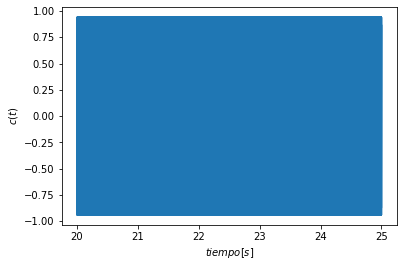

In [ ]:
#Señal portadora en tiempo y frecuencia
plt.plot(tt,c) #graficar señal mensaje en el tiempo
plt.xlabel('$tiempo [s]$')
plt.ylabel('$c(t)$')
plt.show()

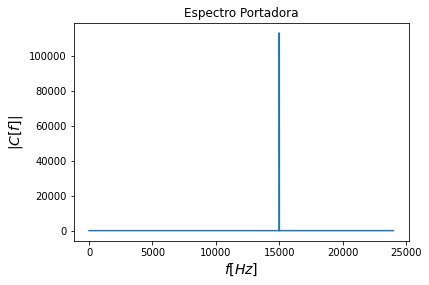

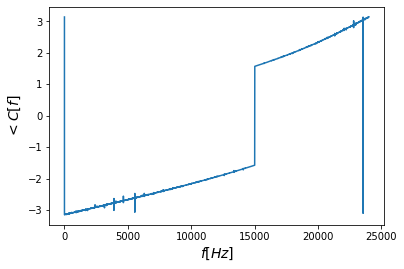

In [ ]:
#Fourier señal portadora
Cw = np.fft.rfft(c) # axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf,abs(Cw))#se grafica la magnitud
plt.title(r'Espectro Portadora')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|C[f]|$',fontsize = 14)
plt.show()


plt.plot(vf, np.angle(Cw))#fase del espectro
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<C[f]$',fontsize = 14)
plt.show()

In [ ]:
#señal modulada
y = (1+m/Ac)*c #señal modulada en AM

In [ ]:
#repoducir modulada
Audio(y,rate=fs)

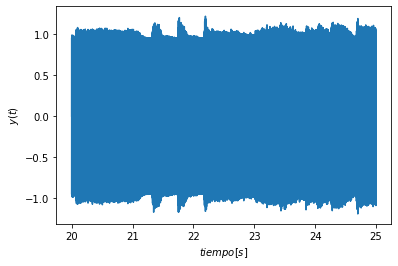

In [ ]:
plt.plot(tt,y) #graficar señal mensaje en el tiempo
plt.xlabel('$tiempo [s]$')
plt.ylabel('$y(t)$')
plt.show()

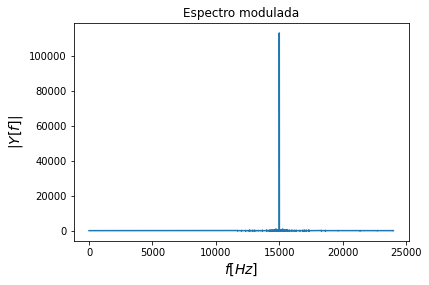

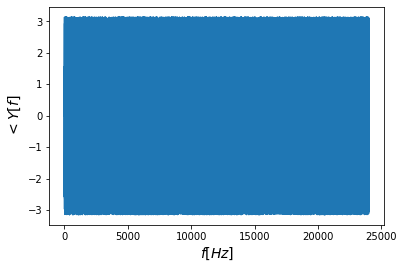

In [ ]:
#Fourier señal modulada
Yw = np.fft.rfft(y) # axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf,abs(Yw))#se grafica la magnitud
plt.title(r'Espectro modulada')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|Y[f]|$',fontsize = 14)
plt.show()


plt.plot(vf, np.angle(Yw))#fase del espectro
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<Y[f]$',fontsize = 14)
plt.show()